In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/time-image-datasetclassification/clocks.csv
/kaggle/input/time-image-datasetclassification/time-99.68.h5
/kaggle/input/time-image-datasetclassification/valid/9-20/56.jpg
/kaggle/input/time-image-datasetclassification/valid/9-20/97.jpg
/kaggle/input/time-image-datasetclassification/valid/9-20/29.jpg
/kaggle/input/time-image-datasetclassification/valid/9-20/16.jpg
/kaggle/input/time-image-datasetclassification/valid/9-20/55.jpg
/kaggle/input/time-image-datasetclassification/valid/9-20/80.jpg
/kaggle/input/time-image-datasetclassification/valid/9-20/24.jpg
/kaggle/input/time-image-datasetclassification/valid/9-20/31.jpg
/kaggle/input/time-image-datasetclassification/valid/9-20/26.jpg
/kaggle/input/time-image-datasetclassification/valid/9-20/87.jpg
/kaggle/input/time-image-datasetclassification/valid/1-15/56.jpg
/kaggle/input/time-image-datasetclassification/valid/1-15/0.jpg
/kaggle/input/time-image-datasetclassification/valid/1-15/61.jpg
/kaggle/input/time-image-datasetclass

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
df = pd.read_csv('/kaggle/input/time-image-datasetclassification/clocks.csv')
df.head()

,class index,filepaths,labels,data set
0,0,train/1-00/0.jpg,1_00,train
1,0,train/1-00/1.jpg,1_00,train
2,0,train/1-00/11.jpg,1_00,train
3,0,train/1-00/12.jpg,1_00,train
4,0,train/1-00/13.jpg,1_00,train


In [5]:
df.columns

Index(['class index', 'filepaths', 'labels', 'data set'], dtype='object')

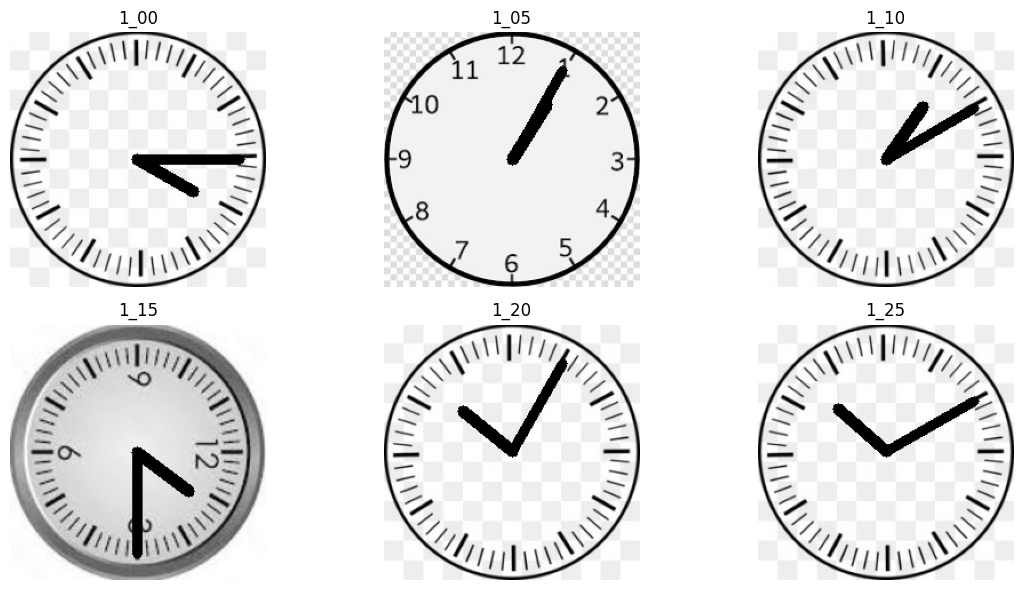

In [6]:
# Fix image paths by joining with the dataset image folder
base_path = '/kaggle/input/time-image-datasetclassification'
df['filepaths'] = df['filepaths'].apply(lambda x: os.path.join(base_path, x))

# sample images (one per label)
plt.figure(figsize=(12, 6))
for i, label in enumerate(df['labels'].unique()[:6]):
    path = df[df['labels'] == label].iloc[0]['filepaths']
    img = Image.open(path)
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [7]:
def extract_features(filepath):
    img = Image.open(filepath).resize((32, 32)).convert('RGB')
    return np.array(img).flatten()

X = np.array([extract_features(path) for path in df['filepaths']])
y = df['labels']

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [9]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

       10_00       0.82      0.90      0.86        20
       10_05       0.85      0.85      0.85        20
       10_10       0.83      1.00      0.91        20
       10_15       0.77      0.85      0.81        20
       10_20       0.80      0.80      0.80        20
       10_25       0.89      0.85      0.87        20
       10_30       0.86      0.90      0.88        20
       10_35       0.94      0.85      0.89        20
       10_40       0.83      1.00      0.91        20
       10_45       0.83      0.95      0.88        20
       10_50       1.00      0.95      0.97        20
       10_55       0.90      0.90      0.90        20
       11_00       0.80      0.80      0.80        20
       11_05       0.86      0.95      0.90        20
       11_10       0.85      0.85      0.85        20
       11_15       0.84      0.80      0.82        20
       11_20       0.86      0.90      0.88        20
       11_25       0.77    

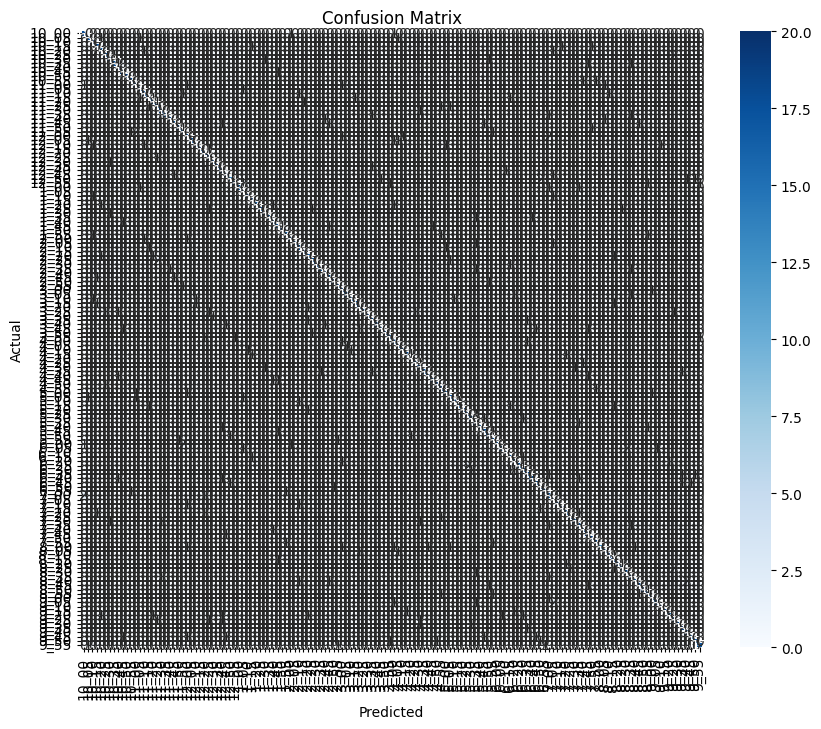

In [11]:
cm = confusion_matrix(y_val, y_pred, labels=model.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()